# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [42]:
import pandas as pd
import matplotlib
matplotlib.__version__
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# read the titanic train.csv file into a dataframe
df = pd.read_csv('train.csv')

In [44]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [45]:
# show the percentage of the passengers that boarded at different ports
df.Embarked.value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

<AxesSubplot:>

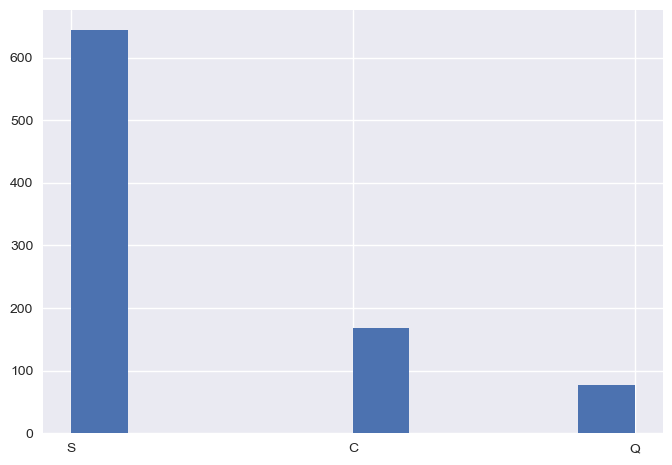

In [46]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
fig, ax = plt.subplots()
plt.style.use('seaborn')
df.Embarked.hist()


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [47]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

# method1
df.groupby('Sex').Survived.value_counts(normalize=True)


Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [48]:
# method2
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [56]:
xindex = np.linspace(0, 1000, 5)
xindex


array([   0.,  250.,  500.,  750., 1000.])

<AxesSubplot:>

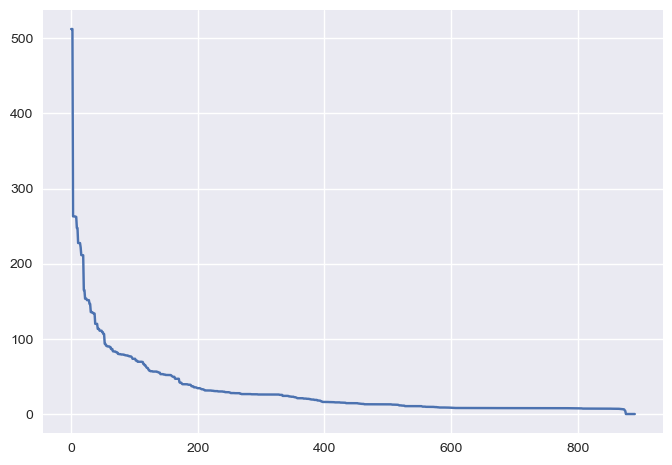

In [74]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
df.sort_values(by='Fare', ignore_index=True, ascending=False).Fare.plot()


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



<AxesSubplot:>

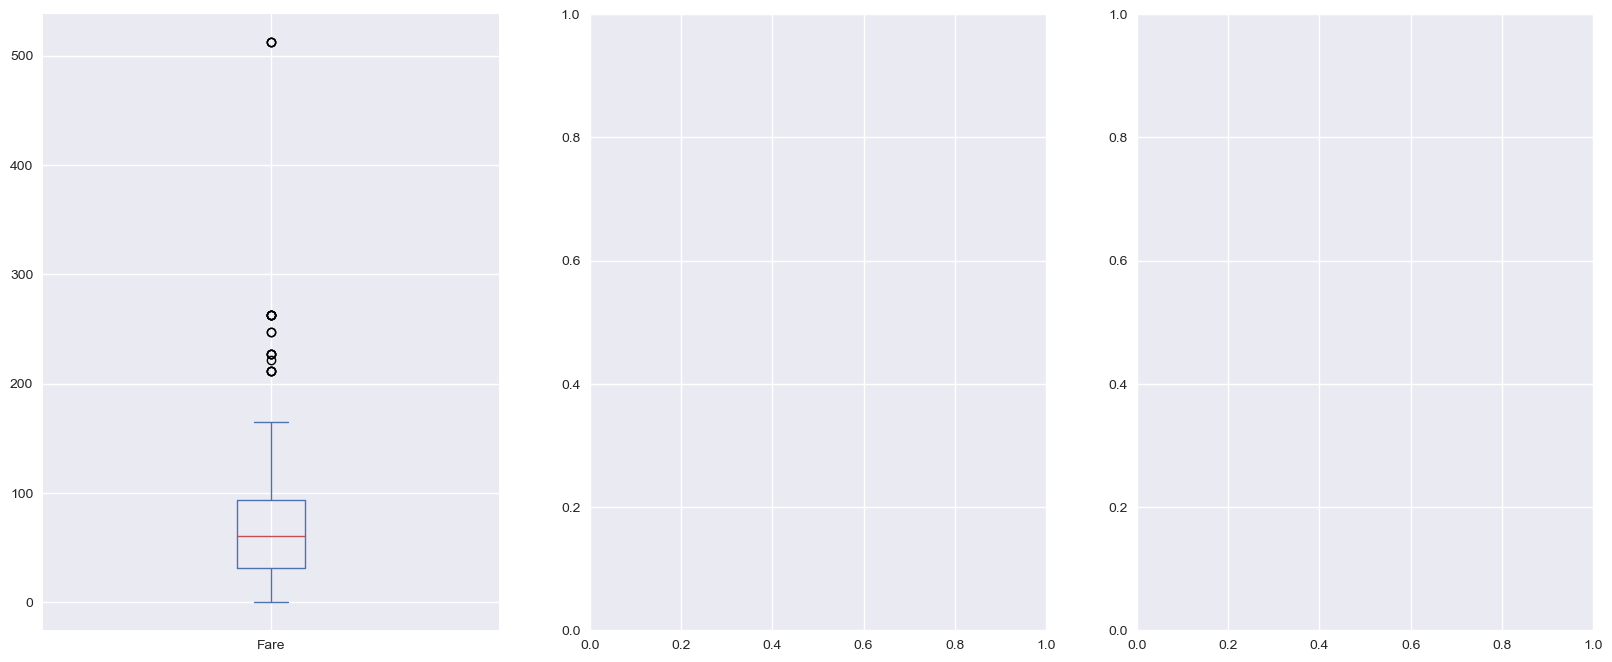

Text(0, 0.5, 'Fare')

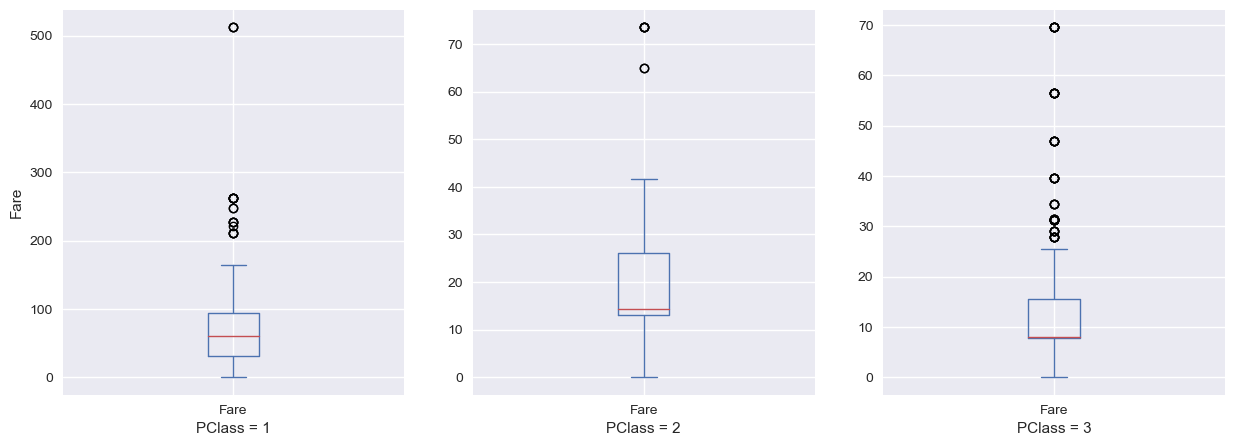

In [122]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

fig, ax = plt.subplots(1, 3, figsize=(15,5))
df_pclass1 = df[df.Pclass == 1]
df_pclass1.Fare.plot.box(ax=ax[0])
df_pclass2 = df[df.Pclass == 2]
df_pclass2.Fare.plot.box(ax=ax[1])
df_pclass3 = df[df.Pclass == 3]
df_pclass3.Fare.plot.box(ax=ax[2])
ax[0].set_xlabel('PClass = 1')
ax[1].set_xlabel('PClass = 2')
ax[2].set_xlabel('PClass = 3')
ax[0].set_ylabel('Fare')

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [102]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
df_after_groupby_pclass = df.groupby('Pclass')
df_after_groupby_pclass.Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### answer: the class 1 had the highest survival rate

<AxesSubplot:xlabel='Pclass,Survived'>

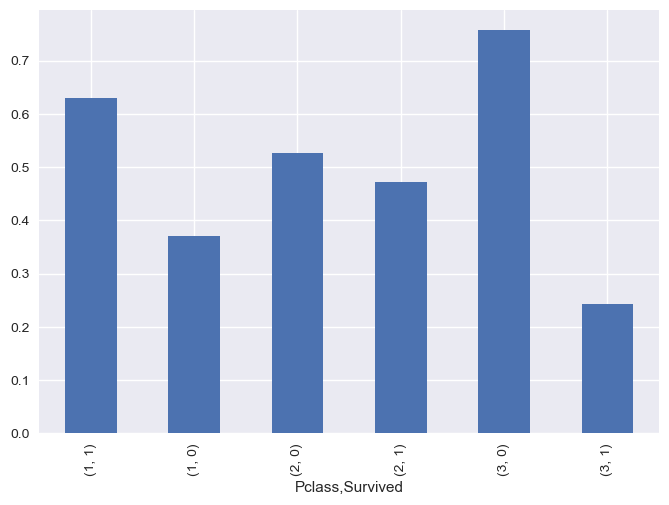

In [117]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
df_after_groupby_pclass = df.groupby('Pclass')
df_after_groupby_pclass.Survived.value_counts(normalize=True).plot.bar()



![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
